In [1]:
import pyaudio as p
import wave as w
import numpy as np
from __future__ import print_function
import librosa
import librosa.display
import IPython.display
import time
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
from keras.models import Sequential
from keras.layers import Dense, Dropout
%matplotlib inline

C:\Users\Nishant\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
FORMAT=p.paInt16
CHANNELS=2
RATE=44100 #sampling frequency rate
CHUNK=1024
RECORD_SECONDS=2
WAVE_OUTPUT_FILENAME="record_1.wav"

recording..1
finished recording
recording.. 2
finished recording
recording.. 3
finished recording
recording.. 4
finished recording
recording.. 5
finished recording
recording.. 6
finished recording
recording.. 7
finished recording
recording.. 8
finished recording
recording.. 9
finished recording
recording.. 10
finished recording
recording.. 11
finished recording
recording.. 12
finished recording
recording.. 13
finished recording
recording.. 14
finished recording
recording.. 15
finished recording
recording.. 16
finished recording
recording.. 17
finished recording
recording.. 18
finished recording
recording.. 19
finished recording
recording.. 20
finished recording


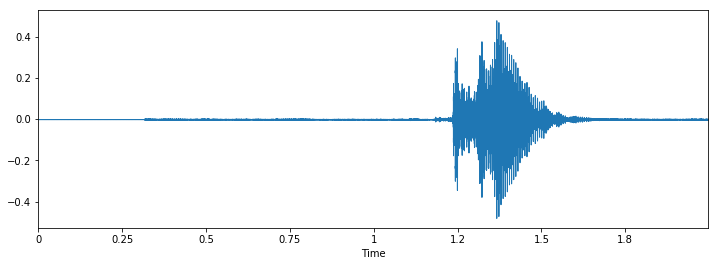

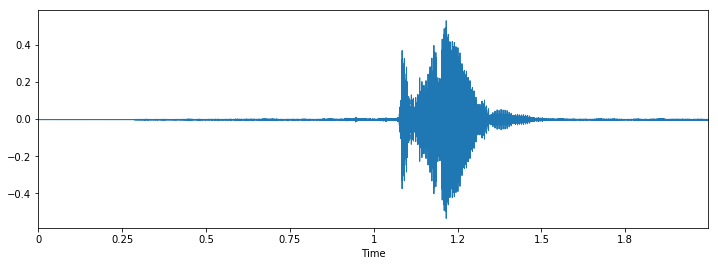

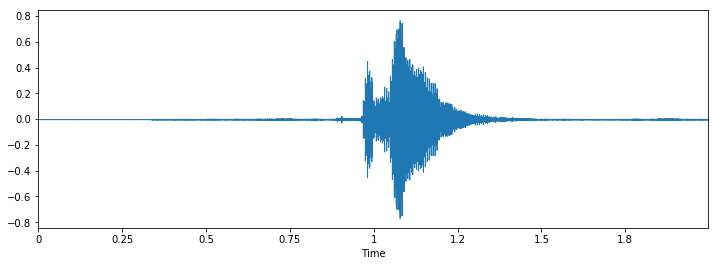

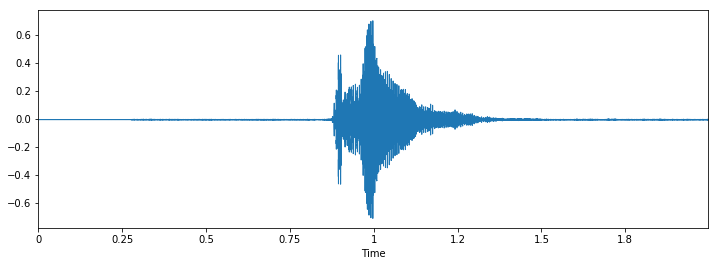

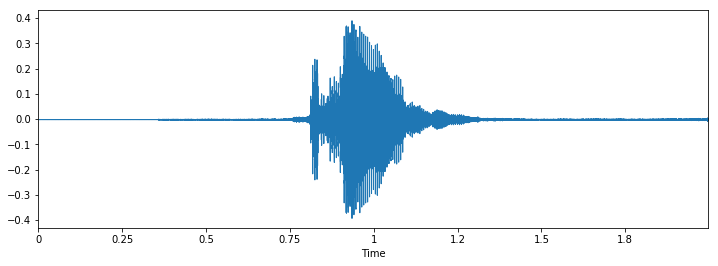

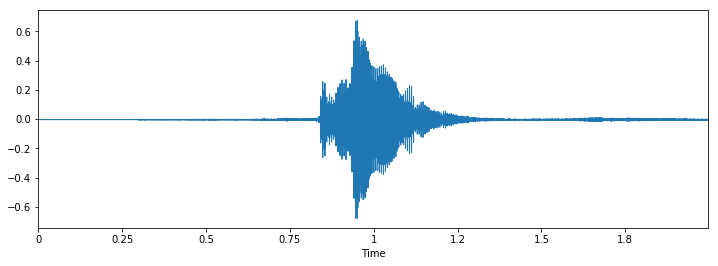

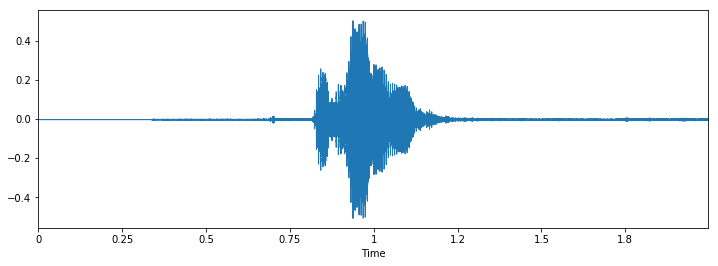

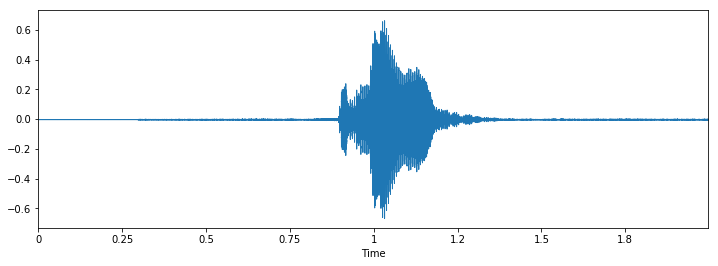

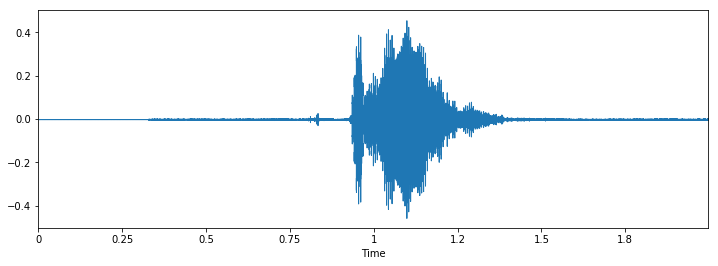

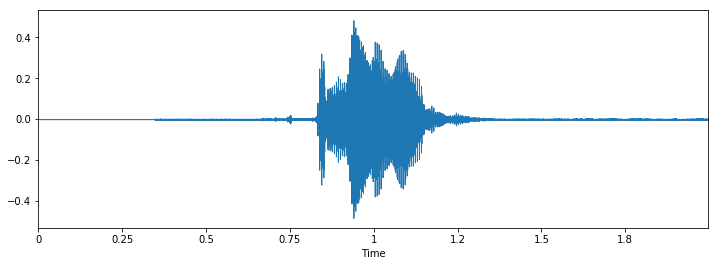

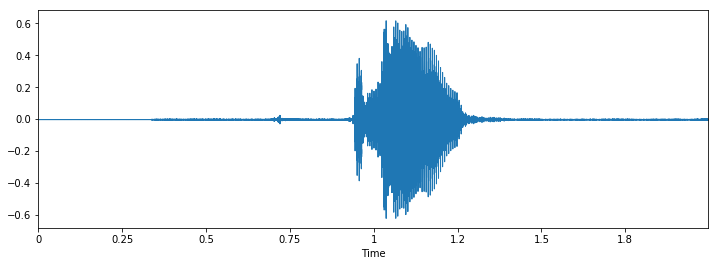

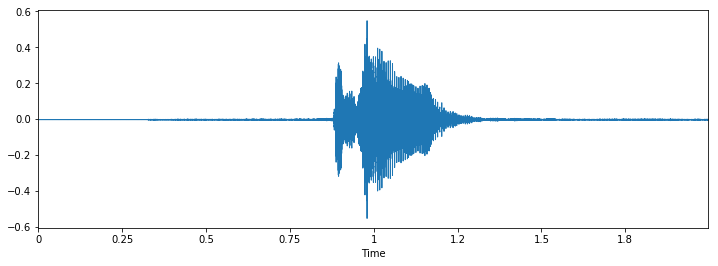

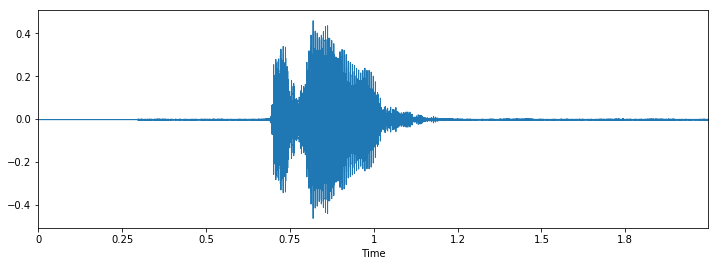

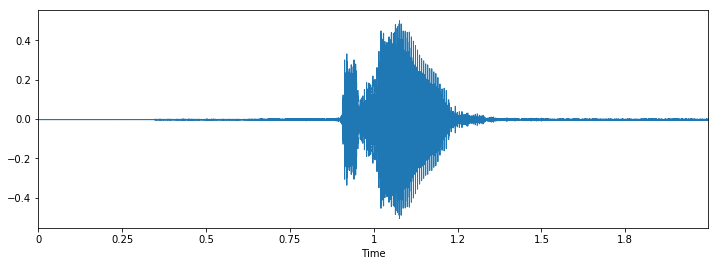

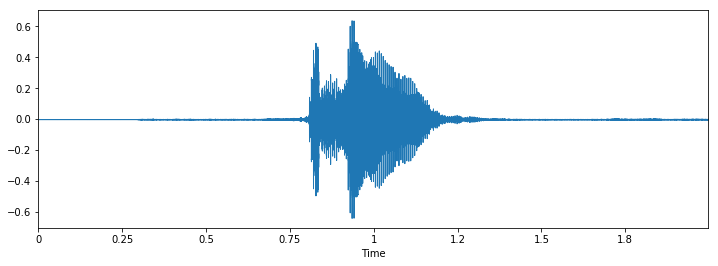

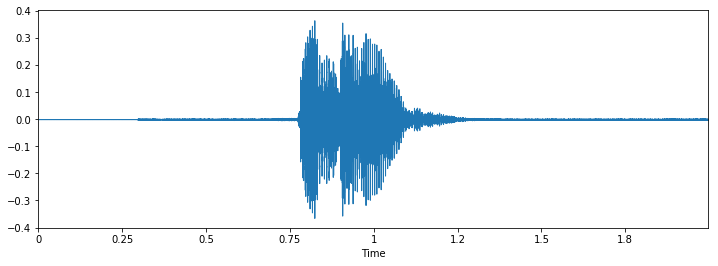

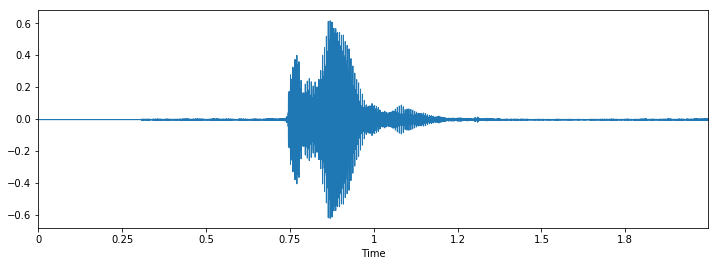

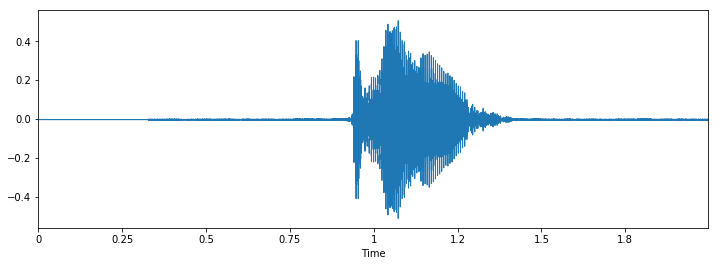

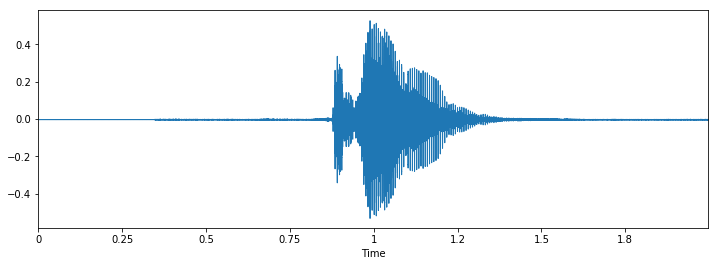

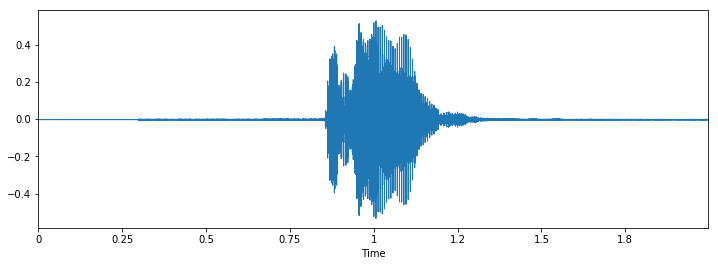

In [3]:
#start recording
audio=p.PyAudio()
stream=audio.open(format=FORMAT,channels=CHANNELS,rate=RATE,input=True,output=True,frames_per_buffer=CHUNK)
#for 1st input
print("recording..1")
frames=[]
for j in range(0,int(RATE/CHUNK * RECORD_SECONDS)):
    data=stream.read(CHUNK)
    frames.append(data)
print("finished recording")

#stop recording 
stream.stop_stream()
stream.close()
audio.terminate()

#save file
waveFile = w.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()


#load audio file
audio_path=WAVE_OUTPUT_FILENAME
X,sr=librosa.load(audio_path,res_type='kaiser_fast')

#audio signal
plt.figure(figsize=(12,4))
librosa.display.waveplot(X, sr=sr)

#generate mfcc
mfcc=librosa.feature.mfcc(y=X,sr=sr,n_mfcc=128)
df=mfcc

#sleep
time.sleep(1.2)

for i in range(19):
    audio=p.PyAudio()
    stream=audio.open(format=FORMAT,channels=CHANNELS,rate=RATE,input=True,output=True,frames_per_buffer=CHUNK)
    print("recording..",(i+2))
    frames=[]
    for j in range(0,int(RATE/CHUNK * RECORD_SECONDS)):
        data=stream.read(CHUNK)
        frames.append(data)
    print("finished recording")

    #stop recording 
    stream.stop_stream()
    stream.close()
    audio.terminate()
    
    #save file
    waveFile = w.open(WAVE_OUTPUT_FILENAME, 'wb')
    waveFile.setnchannels(CHANNELS)
    waveFile.setsampwidth(audio.get_sample_size(FORMAT))
    waveFile.setframerate(RATE)
    waveFile.writeframes(b''.join(frames))
    waveFile.close()
    
    
    #load audio file
    audio_path=WAVE_OUTPUT_FILENAME
    X,sr=librosa.load(audio_path,res_type='kaiser_fast')
    #audio signal
    plt.figure(figsize=(12,4))
    librosa.display.waveplot(X, sr=sr)
    
    #generate mfcc
    mfcc=librosa.feature.mfcc(y=X,sr=sr,n_mfcc=128)
    df=np.concatenate((df,mfcc),axis=0)
    time.sleep(1.2)
    

In [4]:
df.shape

(2560, 87)

In [5]:
#display in notebook
IPython.display.Audio(data=X,rate=sr)

In [6]:
label=[]
for i in range(0,2560):
    label.append(1)
label= np.array(label)

In [7]:
label.shape

(2560,)

# Add another person

In [10]:
df1=df

In [11]:
FORMAT=p.paInt16
CHANNELS=2
RATE=44100 #sampling frequency rate
CHUNK=1024
RECORD_SECONDS=2
WAVE_OUTPUT_FILENAME="another.wav"

In [12]:
#start recording
audio=p.PyAudio()
stream=audio.open(format=FORMAT,channels=CHANNELS,rate=RATE,input=True,frames_per_buffer=CHUNK)
print("recording..")
frames=[]
for i in range(0,int(RATE/CHUNK * RECORD_SECONDS)):
    data=stream.read(CHUNK)
    frames.append(data)
print("finished recording")

#stop recording 
stream.stop_stream()
stream.close()
audio.terminate()

recording..
finished recording


In [13]:
waveFile = w.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()

In [14]:
audio_path= WAVE_OUTPUT_FILENAME
X_1,sr_1=librosa.load(audio_path,res_type='kaiser_fast')
#display in notebook
IPython.display.Audio(data=X_1,rate=sr_1)

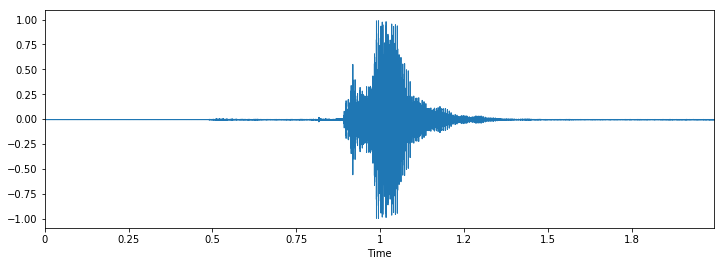

In [15]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(X_1, sr=sr_1)

In [16]:
X_another=librosa.feature.mfcc(y=X_1,sr=sr_1,n_mfcc=128)
X_another.shape

(128, 87)

In [17]:
df.shape

(2560, 87)

In [18]:
df=np.concatenate((df,X_another),axis=0)

In [19]:
y_another=[]
for i in range(0,128):
    y_another.append(0)
y_another=np.array(y_another)

In [20]:
y_another

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
label=np.concatenate((label,y_another),axis=0)

In [22]:
label

array([1, 1, 1, ..., 0, 0, 0])

# Deep learning model

In [23]:
def create_model():
    #build model
    model=Sequential()
    model.add(Dense(256,input_dim=87,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, init='uniform', activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(2,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    model.summary()
    return model

In [24]:
model=create_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               22528     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
Total para

C:\Users\Nishant\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform")`
  


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,label,test_size=0.2,random_state=21)

In [26]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(2150, 87) (2150,) (538, 87) (538,)


In [27]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [28]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=5,epochs=20)

Train on 2150 samples, validate on 538 samples
Epoch 1/20
2150/2150 [==============================] - 3s 1ms/step - loss: 0.3353 - acc: 0.9516 - val_loss: 0.2326 - val_acc: 0.9517
Epoch 2/20
2150/2150 [==============================] - 2s 918us/step - loss: 0.2334 - acc: 0.9516 - val_loss: 0.1998 - val_acc: 0.9517
Epoch 3/20
2150/2150 [==============================] - 2s 847us/step - loss: 0.1750 - acc: 0.9521 - val_loss: 0.1574 - val_acc: 0.9517
Epoch 4/20
2150/2150 [==============================] - 2s 815us/step - loss: 0.1477 - acc: 0.9493 - val_loss: 0.1399 - val_acc: 0.9219
Epoch 5/20
2150/2150 [==============================] - 2s 782us/step - loss: 0.1179 - acc: 0.9535 - val_loss: 0.1532 - val_acc: 0.9535
Epoch 6/20
2150/2150 [==============================] - 2s 848us/step - loss: 0.1220 - acc: 0.9526 - val_loss: 0.1042 - val_acc: 0.9517
Epoch 7/20
2150/2150 [==============================] - 2s 849us/step - loss: 0.1106 - acc: 0.9558 - val_loss: 0.0957 - val_acc: 0.9572
Epo

# Testing

In [224]:
FORMAT=p.paInt16
CHANNELS=2
RATE=44100 #sampling frequency rate
CHUNK=1024
RECORD_SECONDS=2
WAVE_OUTPUT_FILENAME="test.wav"
audio=p.PyAudio()

#start recording
stream=audio.open(format=FORMAT,channels=CHANNELS,rate=RATE,input=True,frames_per_buffer=CHUNK)
print("recording..")
frames=[]
for i in range(0,int(RATE/CHUNK * RECORD_SECONDS)):
    data=stream.read(CHUNK)
    frames.append(data)
print("finished recording")

#stop recording 
stream.stop_stream()
stream.close()
audio.terminate()

recording..
finished recording


In [225]:
waveFile = w.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()

In [226]:
#load audio file
audio_path= WAVE_OUTPUT_FILENAME
X_2,sr_2=librosa.load(audio_path,res_type='kaiser_fast')
#display in notebook
IPython.display.Audio(data=X_2,rate=sr_2)

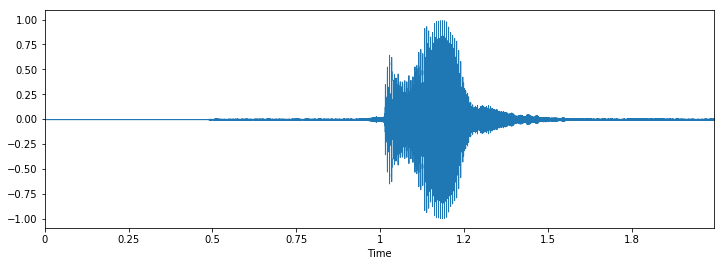

In [227]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(X_2, sr=sr_2)

In [228]:
X_user_test=librosa.feature.mfcc(y=X_2,sr=sr_2,n_mfcc=128)
X_user_test.shape

(128, 87)

In [229]:
X_user_test

array([[-5.33848745e+02, -5.33848745e+02, -5.33848745e+02, ...,
        -4.47662318e+02, -4.35988752e+02, -4.27729632e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.36509235e+01,  6.13203700e+01,  5.49334629e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.71931244e+00, -8.03172426e+00, -1.25705953e+01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.02603756e+00, -9.24706536e-01,  3.38699578e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.41149713e-01, -1.58848973e+00, -7.94308566e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -6.58430299e-02, -2.15805889e+00, -1.79064099e+00]])

In [230]:
y_user_test=[]
for i in range(0,128):
    y_user_test.append(1)

In [231]:
score=model.evaluate(X_user_test,y_user_test,verbose=0)

In [232]:
score

[1.0726865008473396, 0.765625]